# CNN Model: Reading Hand Number Digits

# 1. Data Preparation

In [3]:
# Make the relevant imports
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install kagglehub
import kagglehub # Import to download the dataset to Google Colab

# Download latest version of the dataset directly from Kaggle
path = kagglehub.dataset_download("roshea6/finger-digits-05")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/roshea6/finger-digits-05/versions/1


In [7]:
# Get kaggle data
os.chdir(path + '/training_images (copy)')
os.listdir()[0:5] # Confirm that we have downloaded the png images

['72_5.png', '1883_0.png', '1130_0.png', '633_1.png', '980_3.png']

In [8]:
# Confirm the files in the directory are images and add it to the image_paths list
image_paths = [f for f in os.listdir() if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
from PIL import Image

# Using image_paths list, open and add the actual images to a NumPy array
images=[]
for image_file in image_paths:
    with Image.open(image_file) as image:
        images.append(np.array(image))

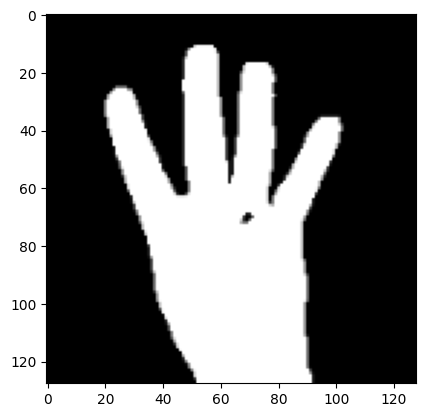

In [9]:
# Confirm that the images are correct
plt.imshow(images[10],cmap='gray')

In [10]:
# Get data and store the images in X and Y in the correct format
X=np.array(images)
X = X.reshape(-1, 128, 128, 1)
Y=[int(image_paths[i].split('_')[1].split('.')[0]) for i in range(len(X))]
Y=np.array(Y)

# Inspect the data
print(X.shape)
print(Y.shape)

(12006, 128, 128, 1)
(12006,)


In [14]:
# Split the data into training, testing and validation subsets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=404)

# Inspect the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9604, 128, 128, 1)
(9604,)
(2402, 128, 128, 1)
(2402,)


In [15]:
# Normalize the data to be values in between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

# 2. Training and Testing the Model

In [16]:
# Create CNN model object
cnn_model = keras.Sequential()

# Create the first convolutional layer and add it to the model object, with ReLU activation
conv_1 = keras.layers.Conv2D(input_shape=X_train[0].shape, filters=10, kernel_size=(3, 3))
ReLU_1 = keras.layers.ReLU()
cnn_model.add(conv_1)
cnn_model.add(ReLU_1)

# Create the pooling layer and add it to the model object:
pooling_layer_1 = keras.layers.MaxPooling2D(pool_size=(2,2))
cnn_model.add(pooling_layer_1)

# Create the second convolutional layer and add it to the model object, with ReLU activation
conv_2 = keras.layers.Conv2D(filters=10, kernel_size=(3,3))
ReLU_2 = keras.layers.ReLU()
cnn_model.add(conv_2)
cnn_model.add(ReLU_2)

# Create the second pooling layer and add it to the model object
pooling_layer_2 = keras.layers.MaxPooling2D(pool_size=(2,2))
cnn_model.add(pooling_layer_2)

# Add a flatten layer to reduce the high number of parameters
flatten_layer = keras.layers.Flatten()
cnn_model.add(flatten_layer)

# Add a dense layer with 128 units
dense_layer = keras.layers.Dense(units=128, activation='relu')
cnn_model.add(dense_layer)

# Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=6, activation='softmax')
cnn_model.add(output_layer)

# See the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 10)        │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 126, 126, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 61, 61, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,152,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,153,912 (4.40 MB)

 Trainable params: 1,153,912 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile and fit the model with the adam optimizer, providing the validation data
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.fit(X,Y,batch_size=32,epochs=2,validation_data=(X_test,y_test))

Epoch 1/2
376/376 ━━━━━━━━━━━━━━━━━━━━ 118s 308ms/step - accuracy: 0.9157 - loss: 3.3182 - val_accuracy: 1.0000 - val_loss: 1.6452
Epoch 2/2
376/376 ━━━━━━━━━━━━━━━━━━━━ 117s 311ms/step - accuracy: 1.0000 - loss: 5.4107e-05 - val_accuracy: 1.0000 - val_loss: 1.6425


# 3. Saving the Trained Model

In [18]:
# Save the model in a hdf5 file in Google Colab with the correct path
os.chdir('/content/sample_data')
cnn_model.save('handNums_model-1104.h5')

# Confirm the director the hdf5 file was saved in
print(os.getcwd())

/content/sample_data


In [ ]:
# Load the saved model from the hdf5 file and test it on test data
loaded_model = keras.models.load_model('handNums_model-1104.h5')

# Test the loaded model on the test data to ensure no corruption or changes occurred
loss, acc = loaded_model.evaluate(X_test, y_test)
print("Accuracy of Loaded Model = ")
print(acc)

76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9989 - loss: 1.6594
Accuracy of Loaded Model = 
0.9991673827171326


# 4. Deploying using a single function

In [ ]:
# Load the trained model
loaded_model = keras.models.load_model('handNums_model-1104.h5')

Model Prediction: 
4
LED ON


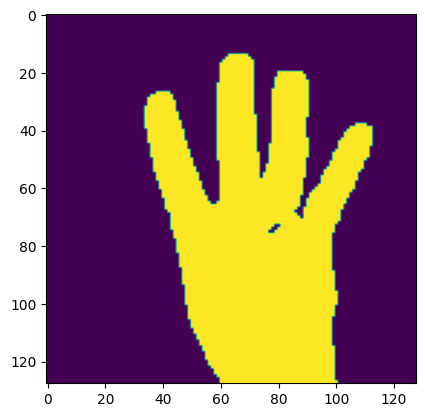

In [ ]:
# Define image pre-processing in a function to ensure uniform inputs
# This function only takes a single image path and returns the image data as a
# NumPy array
def image_preprocessor(image_path):
  img = Image.open(image_path).convert('L') # Open the image
  img = img.resize(size=(128, 128)) # Resize the image
  img_array = (np.array(img) > 100)*255  # Convert to a numpy array

  plt.imshow(img_array) # Show the input to ensure the correct image

  img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
  img_array = img_array.reshape(1, 128, 128, 1)  # Reshape for model input
                # Parameters: (batch_size, image dimension, single channel grayscale)

  return img_array
## End of pre-processing

In [ ]:
img_array = image_preprocessor('1003_4.png') # Load and pre-process the test single test image
prediction = loaded_model(img_array) # use a direct call for small input size
predict_value = np.argmax(prediction) # Find the index with the largest
                  # probability to translate the values into hand number digits

# Print prediction
print("Model Prediction: ")
print(predict_value)

# Take the model output and convert it to be ON or OFF for LEDs
if predict_value % 2 == 0: # Turn on if even number detected
  print("LED ON")
else: # Turn off if odd number detected
  print("LED OFF")